# TicTacToeNet
In this demonstration, TicTacToeNet plays against a human player.

It shows its ability to choose a sensible move based on its policy network, and assess the win probability with its value network. Later, we take a look under the hood to see what TicTacToeNet sees when it makes its decisions.

In [1]:
import os
import sys
import mlflow

sys.path.append(os.getcwd())

In [3]:
from neural_networks.load_model import load_mdl_for_inference
from validation.model_validation import plot_state_assessment, plot_grid_layer
from validation.utils import get_policy_and_value, get_layer_output
from tic_tac_toe.board import TicTacToeBoard
from tic_tac_toe.player import TicTacToeBot

### Initialise Model
Read the trained model from `MLflow` and register a hook to track the state of selected layers during the forward pass.

This will be useful later, to get an idea of what feature maps the model is relying on to make its predictions.

In [4]:
mlflow.set_tracking_uri("http://localhost:5000")
tic_tac_toe_net = load_mdl_for_inference("test_large", 17)

layer_output = {}
tic_tac_toe_net.policy_head.relu_1.register_forward_hook(get_layer_output(layer_output, "Policy Head"))
tic_tac_toe_net.value_head.relu_1.register_forward_hook(get_layer_output(layer_output, "Value Head"))

### Play Against TicTacToeNet
We play through a mock game against the neural network. The game is initialised as a `TicTacToeBoard` object, which contains the game logic.

The human and `TicTacToeNet` then take turns making their move. Before each turn, `TicTacToeNet` considers all the possible moves, assigning them each a probability of being the best move to make. The move with the highest probability is then executed. The game state and predicted move probabilities are visualised.

The model demonstrates strong play, far beyond making random moves. It is able to accurately assess its chances of winning, and which moves are promising.

In [ ]:
board = TicTacToeBoard(TicTacToeBot("player1", "X"), TicTacToeBot("player2", "O"))

**[Turn 1]**

We execute our first move at position **(0, 1)** on the board. Player 1 always moves first, and we have set it up to use the traditional **X** symbol.

In [5]:
board.exec_move((0, 1))

**[Turn 2]**

The neural network makes its move! It gives serious consideration to several possible moves and chooses **(0, 0)**. It thinks that the match is roughly even, with a **value** of 0.518 which is reasonable.

It was close to choosing the more optimal **(1, 1)**, which is interesting. It seems to play better when there are less options available later in the match. This can likely be improved with more Monte Carlo Tree Search iterations during training.

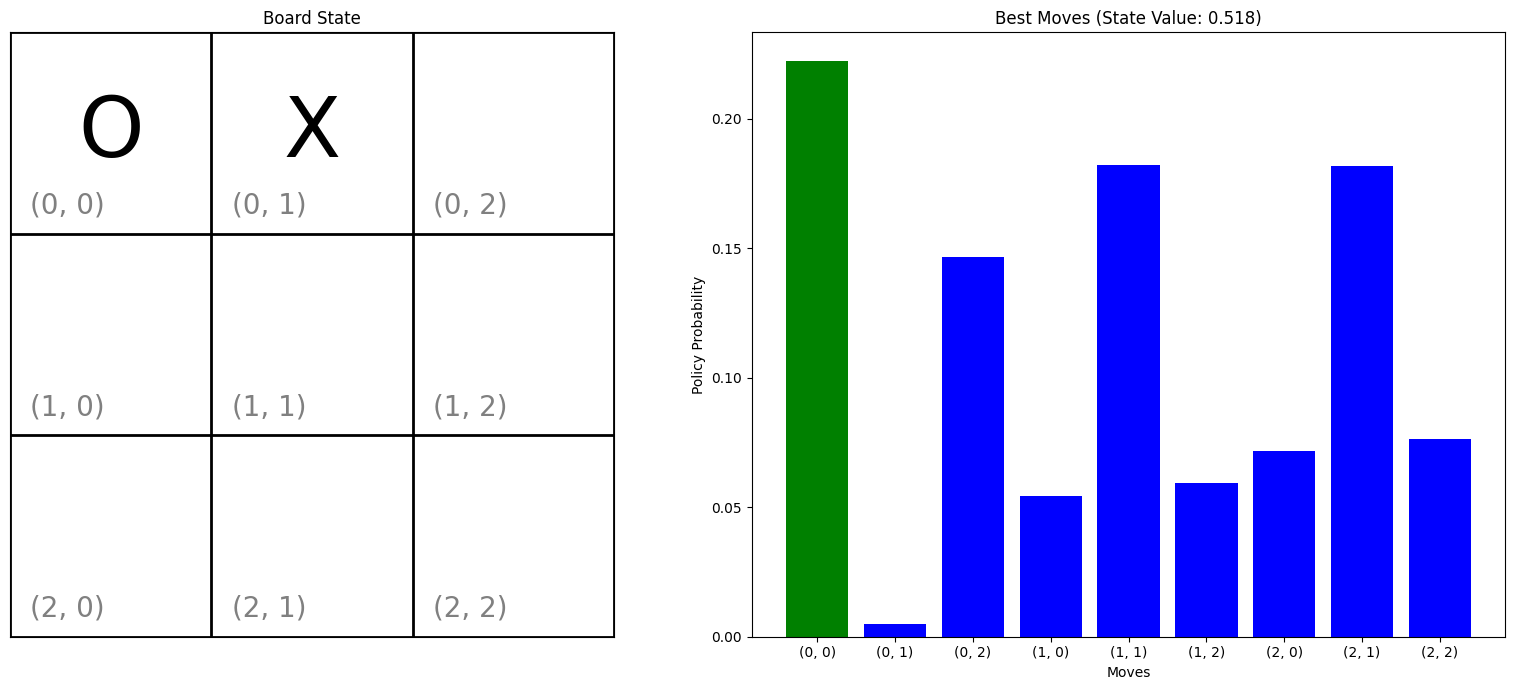

In [6]:
policy, value, best_move = get_policy_and_value(board, tic_tac_toe_net)
board.exec_move(best_move)
plot_state_assessment(board, policy, value)

**[Turn 3]**

We offer our riposte, placing our marker in **(1, 1)** and thereby threatening a win on the next turn if we can play **(2, 1)**.

In [7]:
board.exec_move((1, 1))

**[Turn 4]**

`TicTacToeNet` demonstrates skilled play, foiling this plan by playing **(2, 1)**, preventing a loss.

It is very confident that this is the best move, but is still somewhat concerned about its chances of winning, rating that at less than 50% due to its opponent's strong position.

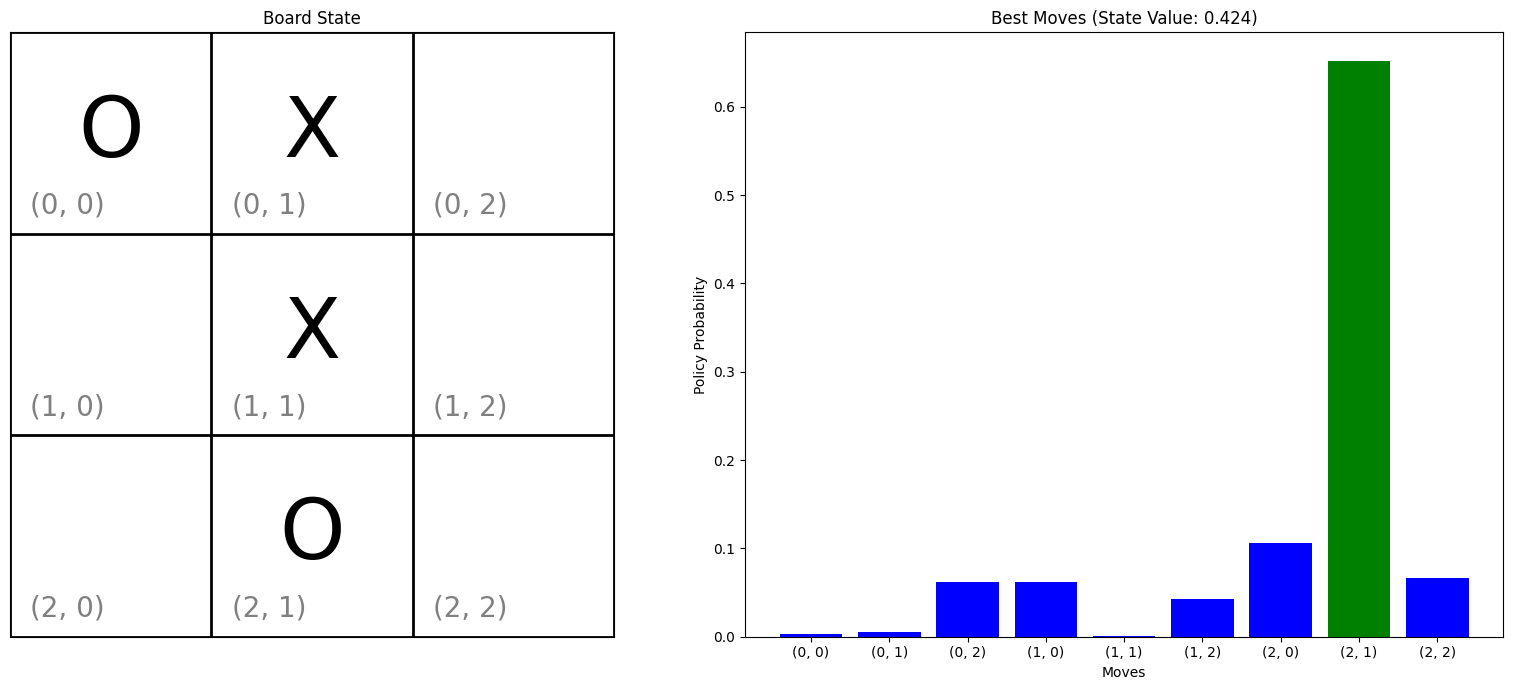

In [8]:
policy, value, best_move = get_policy_and_value(board, tic_tac_toe_net)
board.exec_move(best_move)
plot_state_assessment(board, policy, value)

**[Turn 5]**

This time, we again threaten to win on the next turn across the diagonal by playing **(0, 2)**.

Surely this pattern will be more difficult for the AI to recognise.

In [9]:
board.exec_move((0, 2))

**[Turn 6]**

The threat is confidently recognised, and `TicTacToeNet` now sees itself as the strong favorite to win.

By playing in **(2, 0)**, it neutralises the threat and makes our position hopeless. This excellent move again demonstrates that it is capable of skilled play.

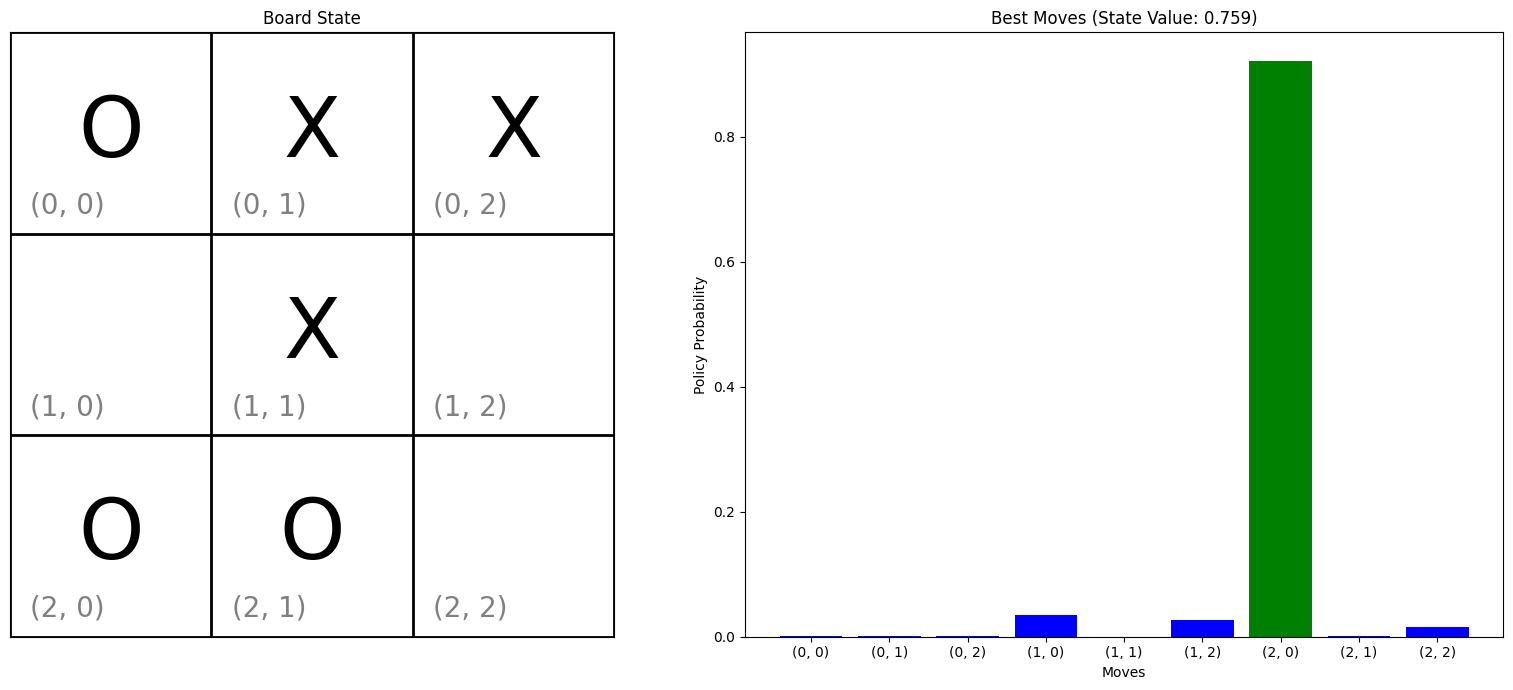

In [10]:
policy, value, best_move = get_policy_and_value(board, tic_tac_toe_net)
board.exec_move(best_move)
plot_state_assessment(board, policy, value)

**[Turn 7]**

Resigned to our fate, we play in **(2, 2)**.

In [11]:
board.exec_move((2, 2))

**[Turn 8]**

The model understands clearly how to finish us off. It plays the winning move **(1, 0)** with near total confidence. It also continues to recognise that it has a very high chance of victory at 76.8%

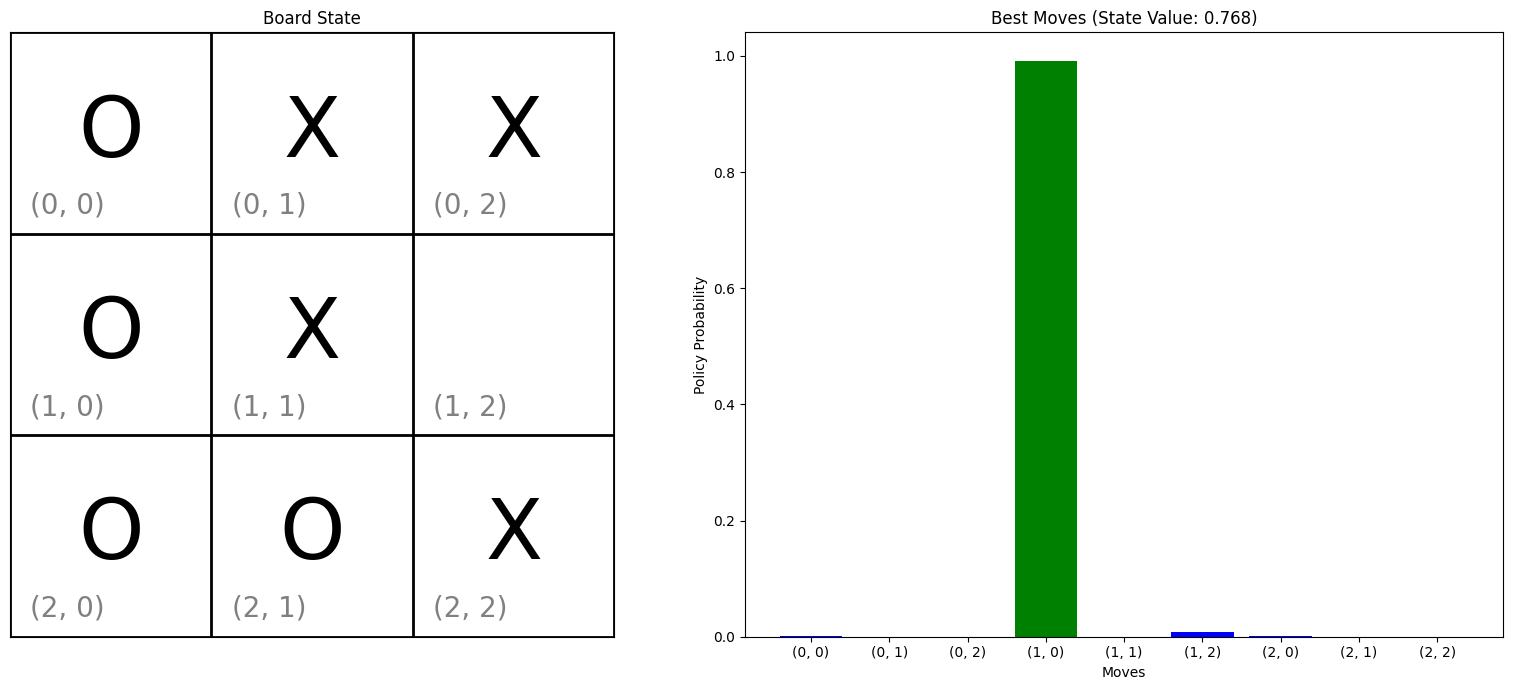

In [12]:
policy, value, best_move = get_policy_and_value(board, tic_tac_toe_net)
board.exec_move(best_move)
plot_state_assessment(board, policy, value)